<b>Import libraries

In [4]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import datetime
from pathlib import Path

SyntaxError: invalid syntax (<ipython-input-4-7beaf81429a6>, line 5)

<b>Import dataset

In [2]:
DATA_PATH = os.path.join(Path(os.getcwd()).parent, "data\data.pkl")

In [3]:
with open(DATA_PATH,"rb") as f:
    df = pickle.load(f)
df

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\Users\\lukas\\AppData\\Roaming\\Python\\Python38\\site-packages\\pandas\\_libs\\internals.cp38-win_amd64.pyd'>

In [4]:
X = df.loc[:,list(set(df.columns) - set(['Date', 'Index', 'sell_signal']))]
y = df.loc[:, "sell_signal"]

<b> Descriptive statistics

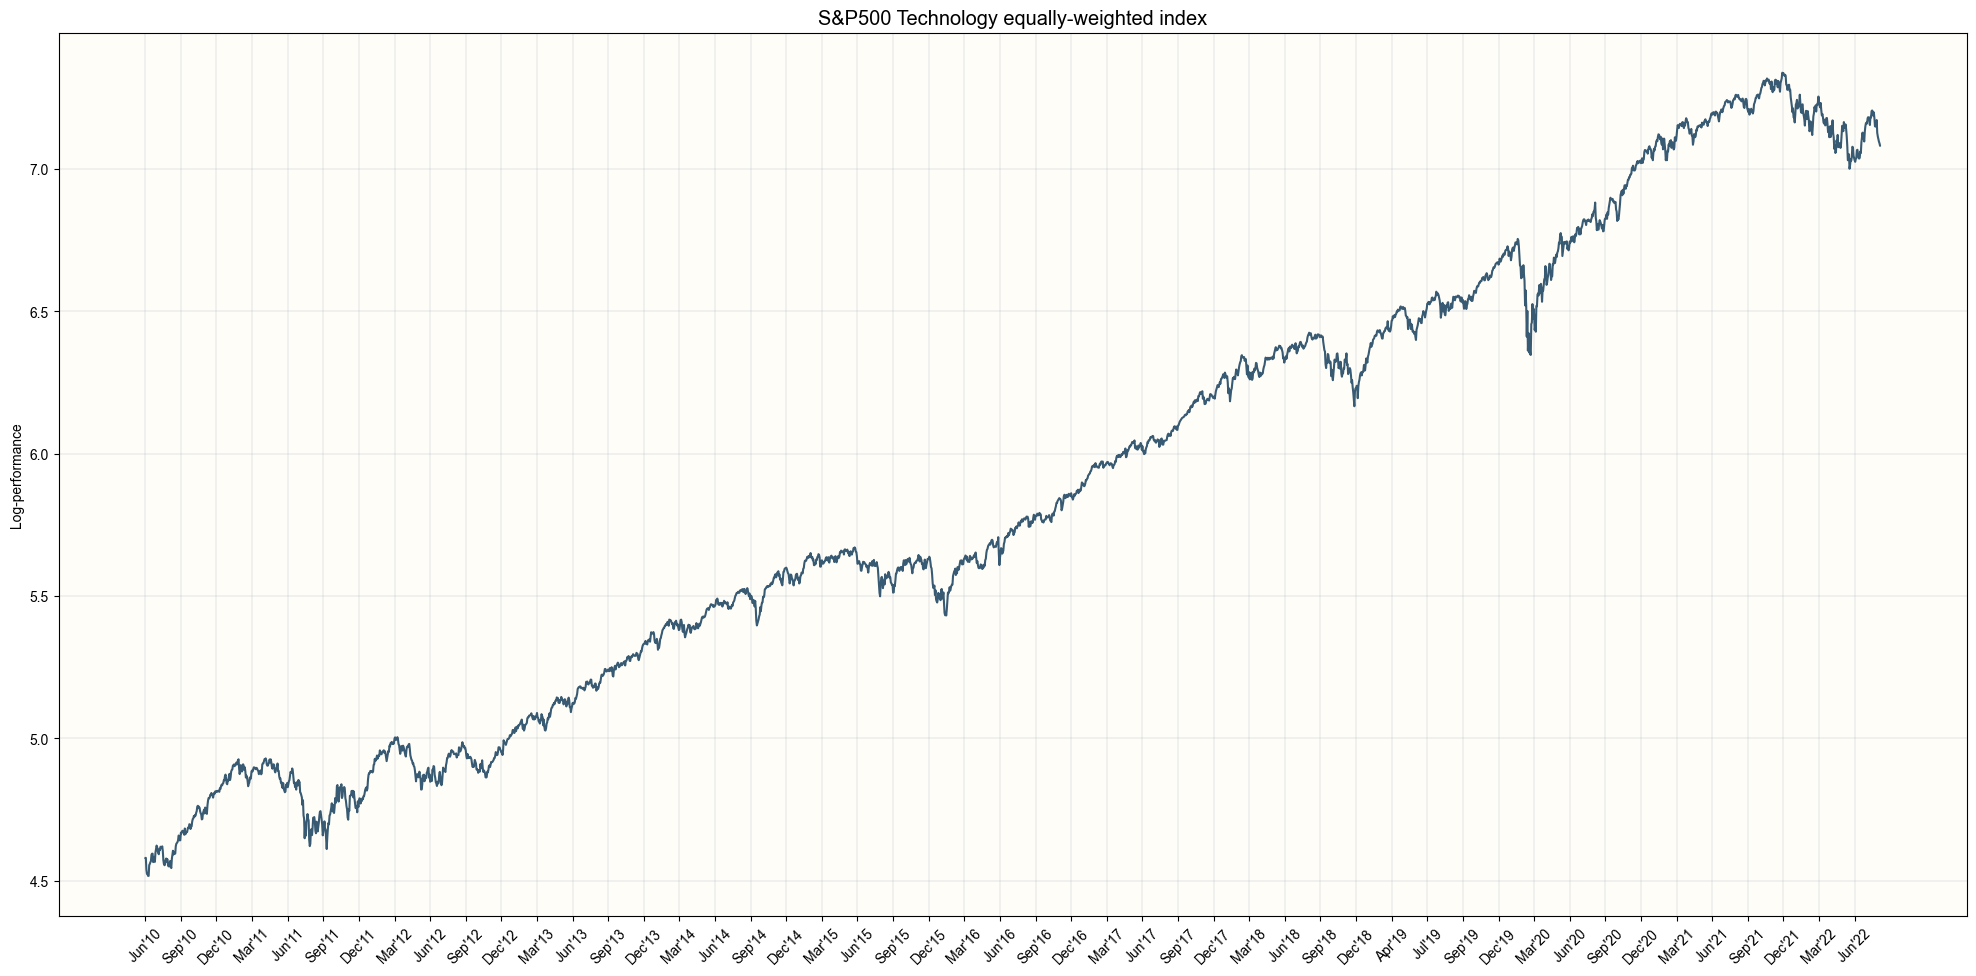

In [5]:
# Plot index

index = df.Index
dates = df.Date

labels_freq = np.arange(0, len(index), 21*3)

labels = []
for i in labels_freq:
    date = dates[i]
    date = datetime.datetime.strptime(date, "%Y-%m-%d")
    date = datetime.datetime.strftime(date, "%b'%y")
    labels.append(date)

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(style="white", font_scale=1.2)

sns.lineplot(y=index, x=range(len(index)), ax=ax, color="#385A72", lw=1.5)

ax.set_title(f"S&P500 Technology equally-weighted index")
ax.set_ylabel("Log-performance")
ax.xaxis.set_ticks(labels_freq)
ax.set_xticklabels(labels)
ax.tick_params(axis = "x", rotation = 45)

ax.xaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)
ax.yaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)

ax.set_facecolor('#FEFDF8')
plt.tight_layout()

In [6]:
# Chart above reveals trend in the data, hence this time series is NOT stationary. Stated in a bit more formal terms, mean and variance is not constant over time.
# Calculating descriptive statistics for non-stationary would have a bias because of the presence of trend. With high probability, out-of-sample data would have different characteristics.
# Therefore, stationarity has impact on statistical inferrence, and before proceeding with time series analysis it is recommended to address the issue.
# Common approach to remove nonstationarity is time series differencing. Let's difference and plot the data then.

In [7]:
# Differencing dataset

d = (df.Index - df.Index.shift(1))*100

d_df = df.copy()
d_df.iloc[:,1] = d
d_df = d_df.dropna(axis = 0).reset_index(drop=True)
d_df

,Date,Index,daily_returns,momentum30,momentum60,momentum120,vs_quantile,vs_quantile_binary,vs_quantile_binary_freq,divergence,lag_returns,sell_signal
0,2010-06-28,0.061532,0.061532,99.368701,99.155543,99.465618,0.141364,0.0,0.083333,-0.031225,0.545185,1
1,2010-06-29,-4.230111,-4.230111,98.279685,97.914172,98.598467,-1.823472,1.0,0.100000,-0.032261,0.061532,1
2,2010-06-30,-1.432674,-1.432674,98.375237,97.596871,98.342961,-0.228739,0.0,0.100000,-0.032895,-4.230111,1
3,2010-07-01,-0.141143,-0.141143,98.439591,97.601193,98.128629,0.136183,0.0,0.100000,-0.033432,-1.432674,1
4,2010-07-02,-0.533799,-0.533799,99.098536,97.588618,98.044630,0.100693,0.0,0.100000,-0.032942,-0.141143,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2022-08-29,-1.253641,-1.253641,100.828226,99.298478,99.694806,-0.143307,0.0,0.133333,0.047900,-4.490781,0
3065,2022-08-30,-0.864527,-0.864527,100.174558,99.445044,99.143211,0.043200,0.0,0.133333,0.048974,-1.253641,0
3066,2022-08-31,-0.955636,-0.955636,99.784020,99.277308,99.218188,0.010588,0.0,0.133333,0.049323,-0.864527,0
3067,2022-09-01,-0.591951,-0.591951,99.476282,99.072472,99.324979,0.095327,0.0,0.133333,0.049185,-0.955636,0


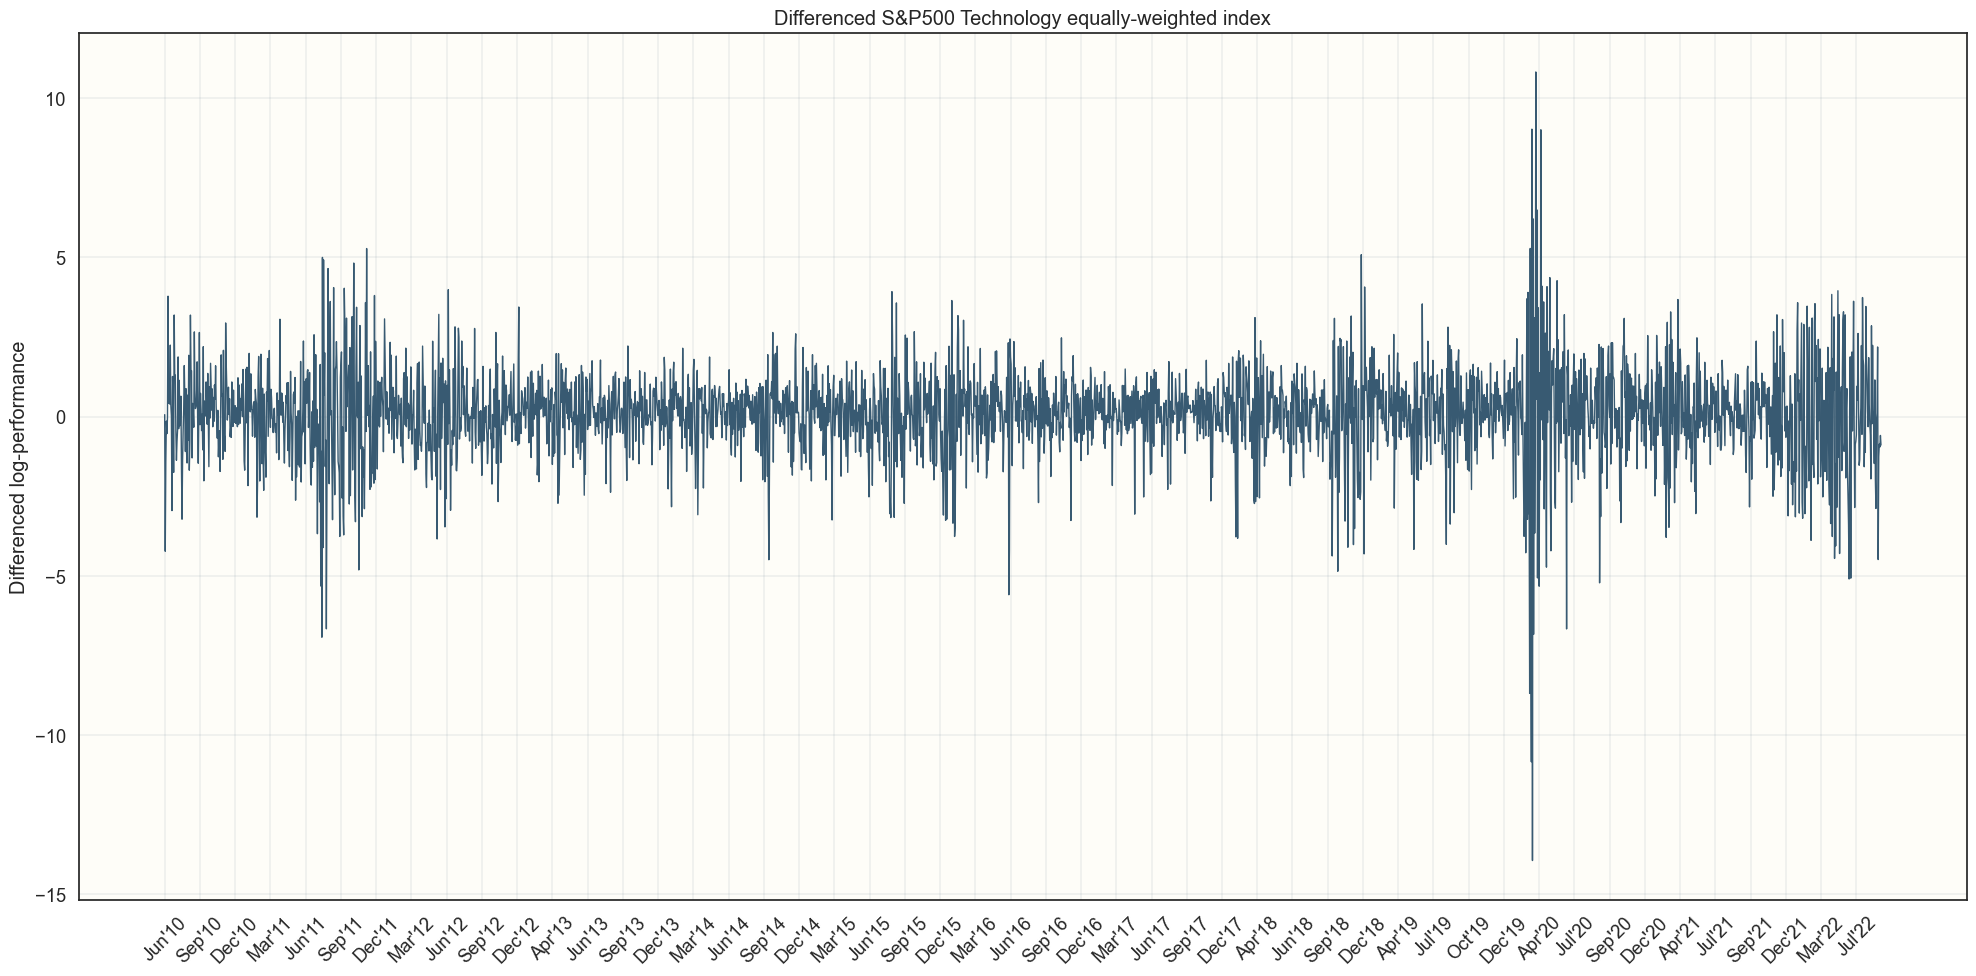

In [8]:
# Plot differenced index

d_index = d_df.Index
dates = d_df.Date

labels_freq = np.arange(0, len(d_index), 21*3)

labels = []
for i in labels_freq:
    date = dates[i]
    date = datetime.datetime.strptime(date, "%Y-%m-%d")
    date = datetime.datetime.strftime(date, "%b'%y")
    labels.append(date)

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(style="white", font_scale=1.2)

sns.lineplot(y=d_index, x=range(len(d_index)), ax=ax, color="#385A72", lw=1)

ax.set_title(f"Differenced S&P500 Technology equally-weighted index")
ax.set_ylabel("Differenced log-performance")
ax.xaxis.set_ticks(labels_freq)
ax.set_xticklabels(labels)
ax.tick_params(axis = "x", rotation = 45)

ax.xaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)
ax.yaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)

ax.set_facecolor('#FEFDF8')
plt.tight_layout()

In [9]:
# Generate basic statistics 

d_index.describe()

count    3069.000000
mean        0.081534
std         1.431632
min       -13.947909
25%        -0.576175
50%         0.138403
75%         0.836104
max        10.829398
Name: Index, dtype: float64

(-0.01, 0.45)

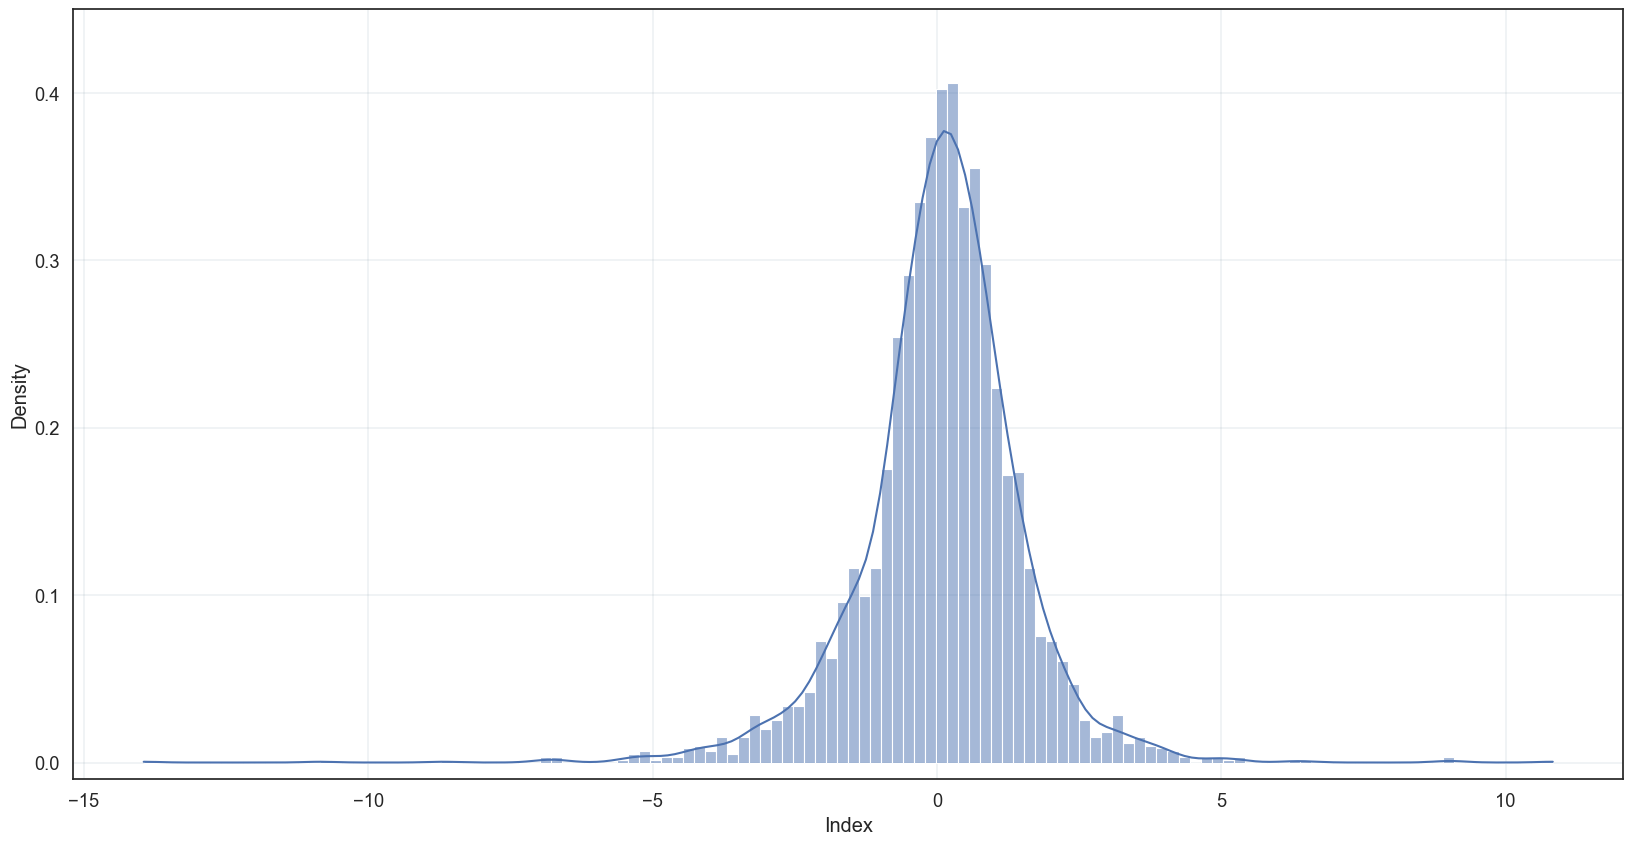

In [10]:
# Plot distribution of returns
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(d_index, kde=True, stat = 'density')
ax.xaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)
ax.yaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)
ax.set_ylim(-0.01, 0.45)

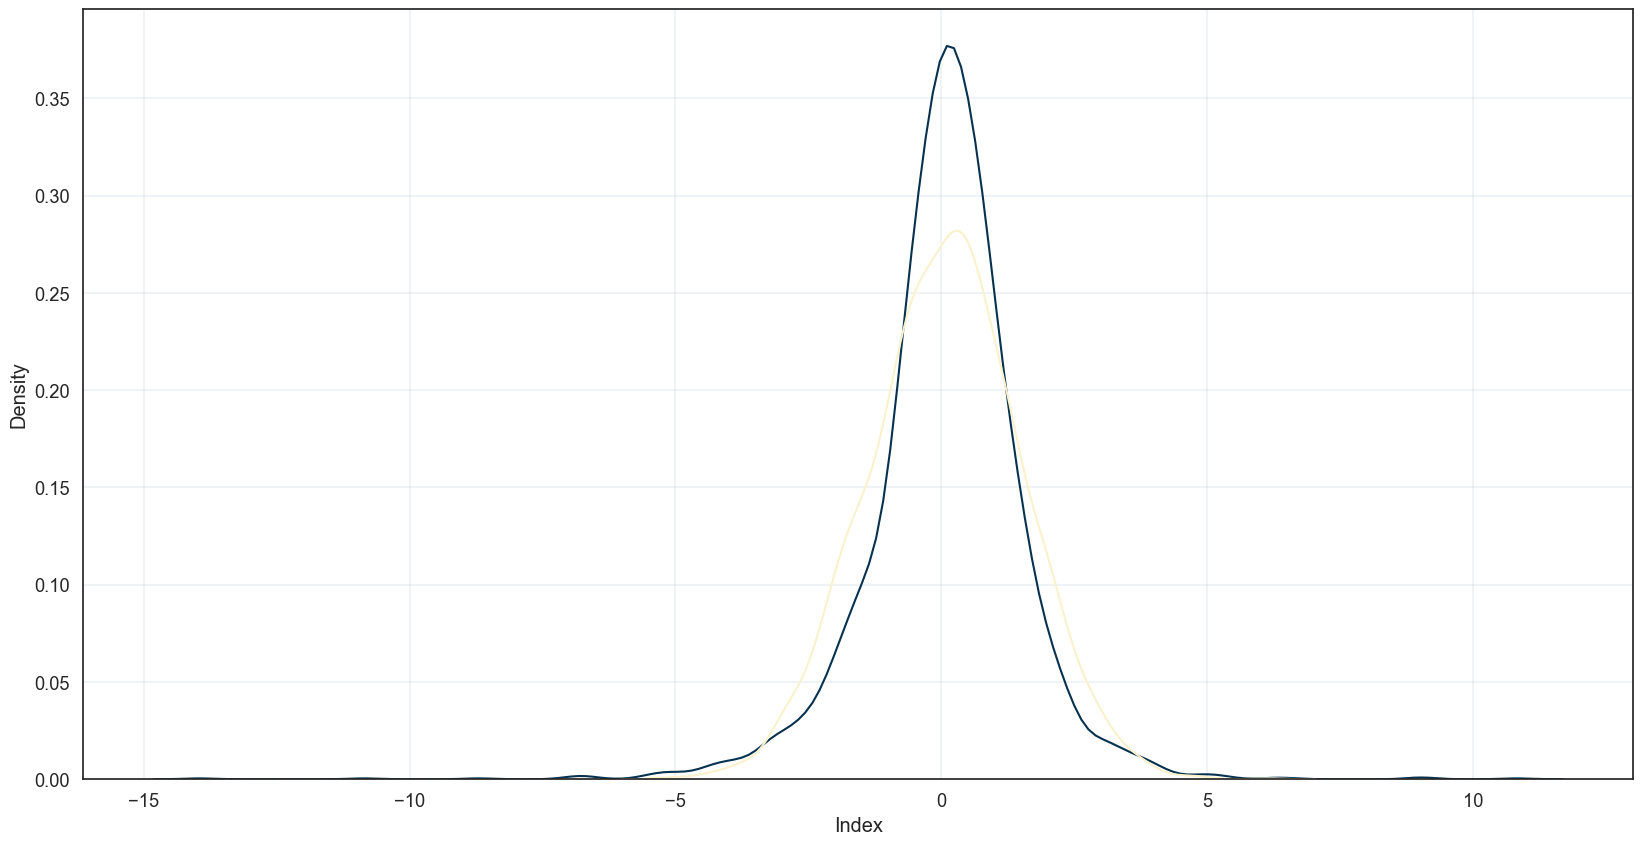

In [11]:
# Plot distribution of returns against normal distribution with 

random_normal = np.random.normal(loc = np.mean(d_index), scale = np.std(d_index), size = len(d_index))

fig, ax = plt.subplots(figsize=(20, 10))

sns.kdeplot(d_index, color = "#06314F")
sns.kdeplot(random_normal, color = "#FAF2CC")
ax.xaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)
ax.yaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)

In [12]:
# Statistical test for normality - Shapiro Wilk

from scipy.stats import shapiro

stat, p = shapiro(d_index)

print("stat = %.3f, p = %.3f\n" % (stat, p))
if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably NOT Gaussian")

stat = 0.931, p = 0.000

Probably NOT Gaussian


In [13]:
# Distribution has heavy tails meaning that there is a larger probability of getting very large values compared to normal distribution.
# In next step, let's explore behaviour of points falling into heavy tails 

In [14]:
# Extract points falling into fat tails using QQ Plot

import scipy.stats as stats

osm, osr = stats.probplot(d_index, dist = "norm")[0]

fat_tails = d_df.copy()

qq = []

for i in range(len(fat_tails)):
    ind = np.where(osr == fat_tails.iloc[i,1])[0][0]
    qq.append(np.float64(osm[ind]))

fat_tails["qq"] = qq
fat_tails

,Date,Index,daily_returns,momentum30,momentum60,momentum120,vs_quantile,vs_quantile_binary,vs_quantile_binary_freq,divergence,lag_returns,sell_signal,qq
0,2010-06-28,0.061532,0.061532,99.368701,99.155543,99.465618,0.141364,0.0,0.083333,-0.031225,0.545185,1,-0.085035
1,2010-06-29,-4.230111,-4.230111,98.279685,97.914172,98.598467,-1.823472,1.0,0.100000,-0.032261,0.061532,1,-2.392485
2,2010-06-30,-1.432674,-1.432674,98.375237,97.596871,98.342961,-0.228739,0.0,0.100000,-0.032895,-4.230111,1,-1.217821
3,2010-07-01,-0.141143,-0.141143,98.439591,97.601193,98.128629,0.136183,0.0,0.100000,-0.033432,-1.432674,1,-0.280482
4,2010-07-02,-0.533799,-0.533799,99.098536,97.588618,98.044630,0.100693,0.0,0.100000,-0.032942,-0.141143,1,-0.633685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2022-08-29,-1.253641,-1.253641,100.828226,99.298478,99.694806,-0.143307,0.0,0.133333,0.047900,-4.490781,0,-1.120764
3065,2022-08-30,-0.864527,-0.864527,100.174558,99.445044,99.143211,0.043200,0.0,0.133333,0.048974,-1.253641,0,-0.916363
3066,2022-08-31,-0.955636,-0.955636,99.784020,99.277308,99.218188,0.010588,0.0,0.133333,0.049323,-0.864527,0,-0.975115
3067,2022-09-01,-0.591951,-0.591951,99.476282,99.072472,99.324979,0.095327,0.0,0.133333,0.049185,-0.955636,0,-0.688560


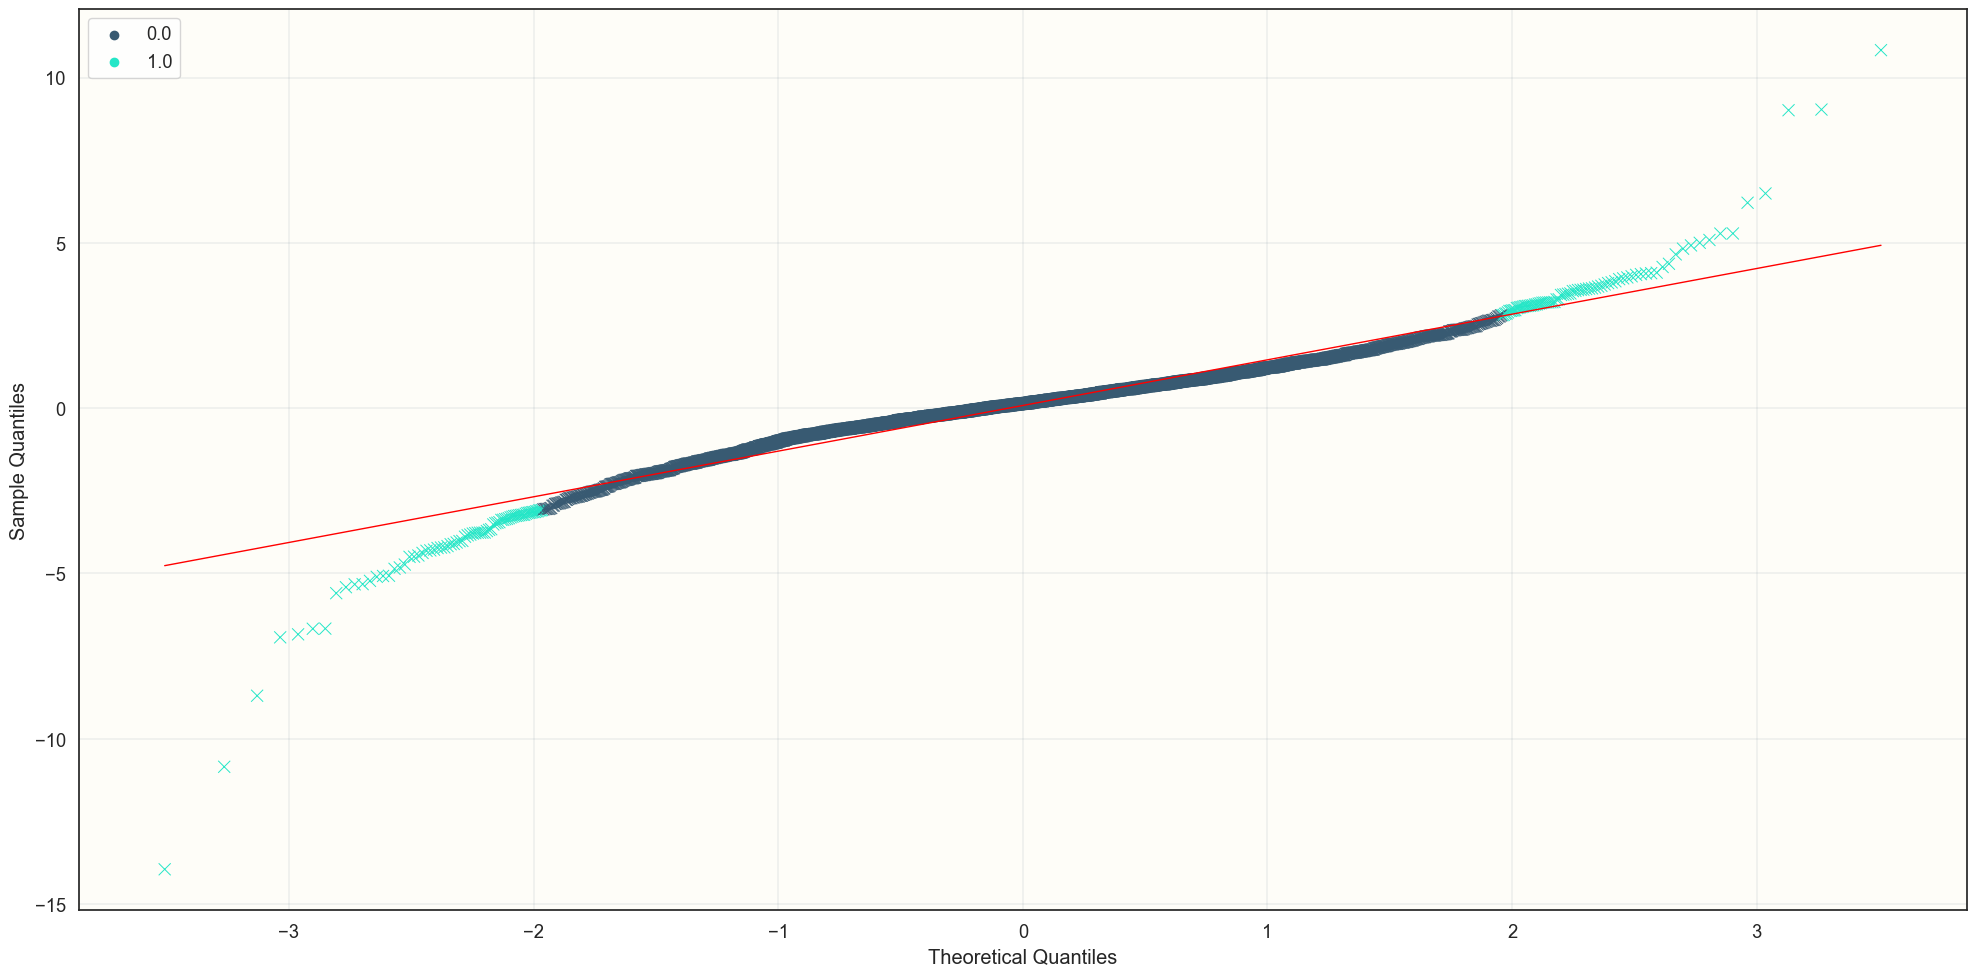

In [15]:
# Create QQ plot with highlighted points that correspond to extreme 5% of observations
# Fit linear regression first

from sklearn.linear_model import LinearRegression

y = np.array(fat_tails.Index).reshape(-1,1)
X = np.array(fat_tails.qq).reshape(-1,1)
model = LinearRegression()
fit = model.fit(X, y)
pred = fit.predict(X).reshape(-1)

# Create the plot

fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(x = fat_tails.qq, y = fat_tails.Index, hue = fat_tails.vs_quantile_binary, palette = ["#385A72", "#24E6C7"], s = 75, marker = "x")
sns.lineplot(x = fat_tails.qq, y = pred, lw = 1, color = "red")
ax.set_ylabel("Sample Quantiles")
ax.set_xlabel("Theoretical Quantiles")

ax.xaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)
ax.yaxis.grid('True', color = '#385A72', which = 'major', linewidth = 0.1)

ax.set_facecolor('#FEFDF8')
plt.tight_layout()

In [16]:
# Chart above confirms that vs_qq_binary feature properly captures extreme values. Let's explore properties of those points.

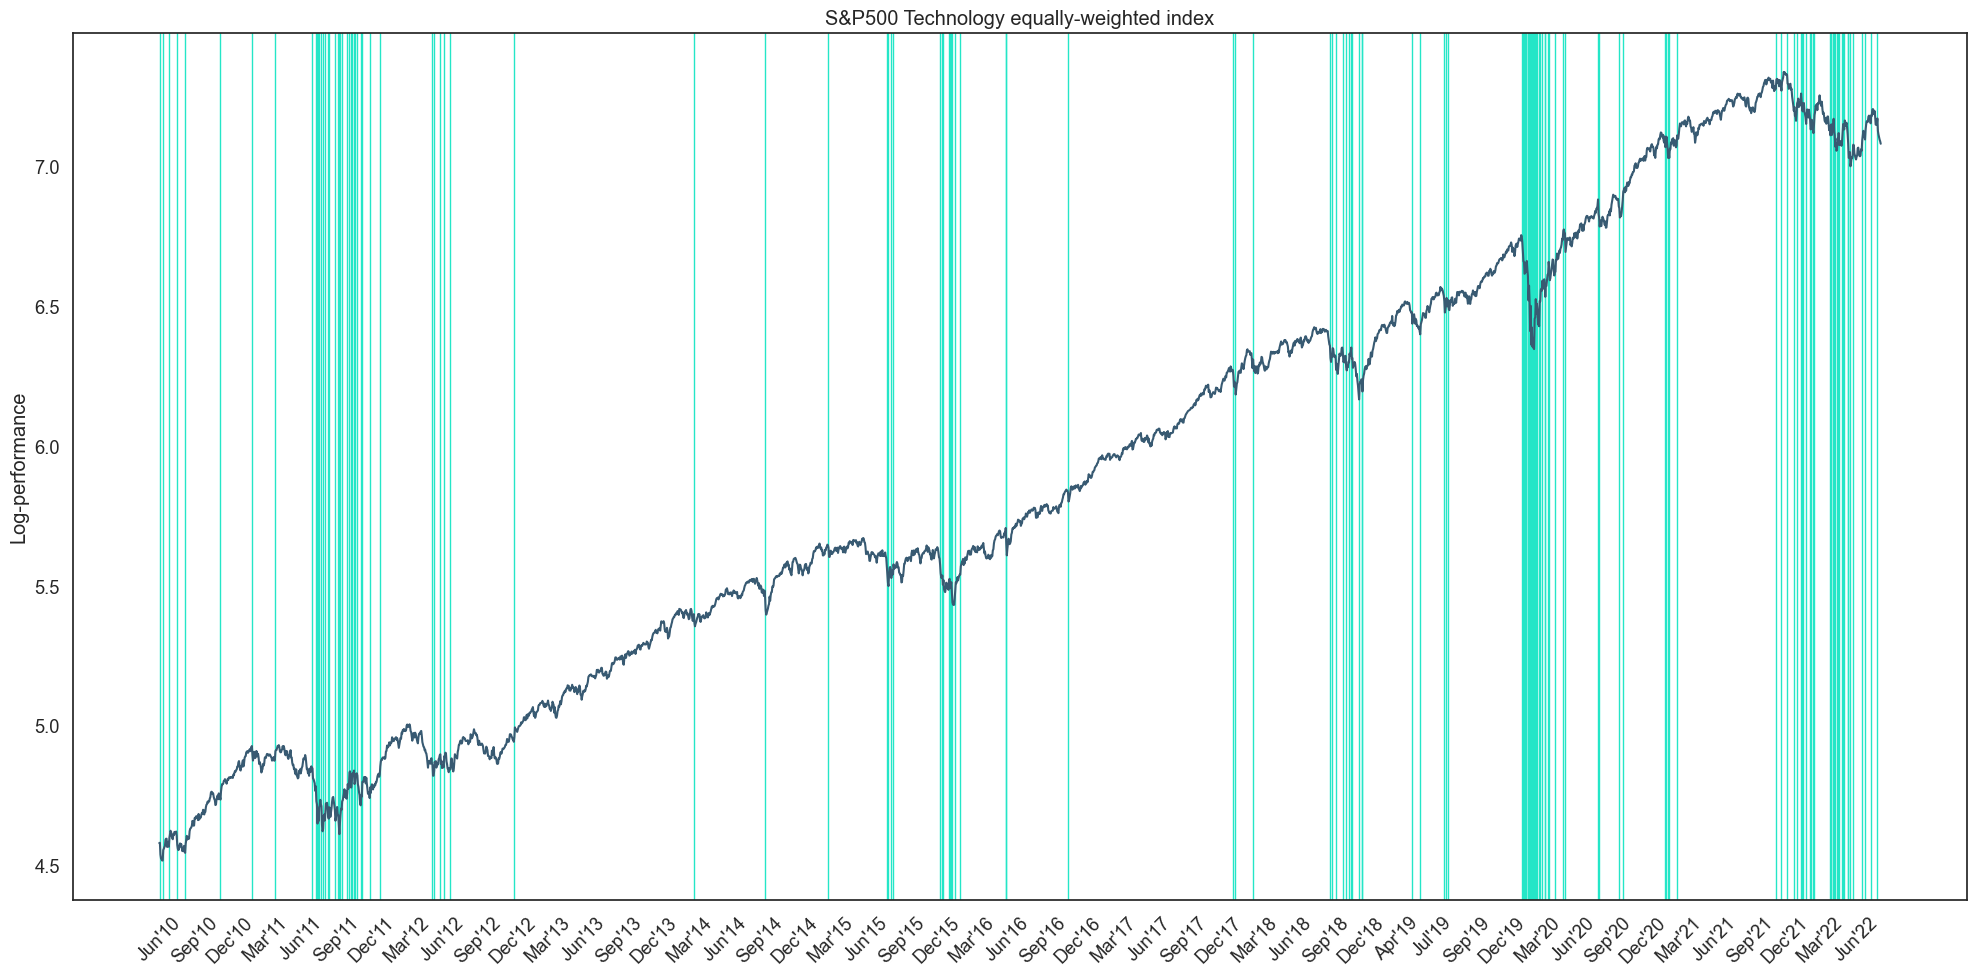

In [17]:
# Where those points lie on time series chart?

# Prepare data for time series chart

index = df.Index
dates = df.Date

labels_freq = np.arange(0, len(index), 21*3)

labels = []
for i in labels_freq:
    date = dates[i]
    date = datetime.datetime.strptime(date, "%Y-%m-%d")
    date = datetime.datetime.strftime(date, "%b'%y")
    labels.append(date)

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(style="white", font_scale=1.2)

# Add horizontal lines corresponding to feature vs_qq_binary; ie. highlight extreme values

for ind in fat_tails.loc[fat_tails.vs_quantile_binary == True, :].index:
    if fat_tails.loc[ind, "Index"] >= 0:
        ax.axvline(x = ind, lw = 1, color = "#24E6C7")
    else: 
        ax.axvline(x = ind, lw = 1, color = "#24E6C7") # if color changed to white, then only negative extremes will be plotted

# Create time series chart

sns.lineplot(y=index, x=range(len(index)), ax=ax, color="#385A72", lw=1.5)

ax.set_title(f"S&P500 Technology equally-weighted index")
ax.set_ylabel("Log-performance")
ax.xaxis.set_ticks(labels_freq)
ax.set_xticklabels(labels)
ax.tick_params(axis = "x", rotation = 45)

ax.set_facecolor('white')
plt.tight_layout()

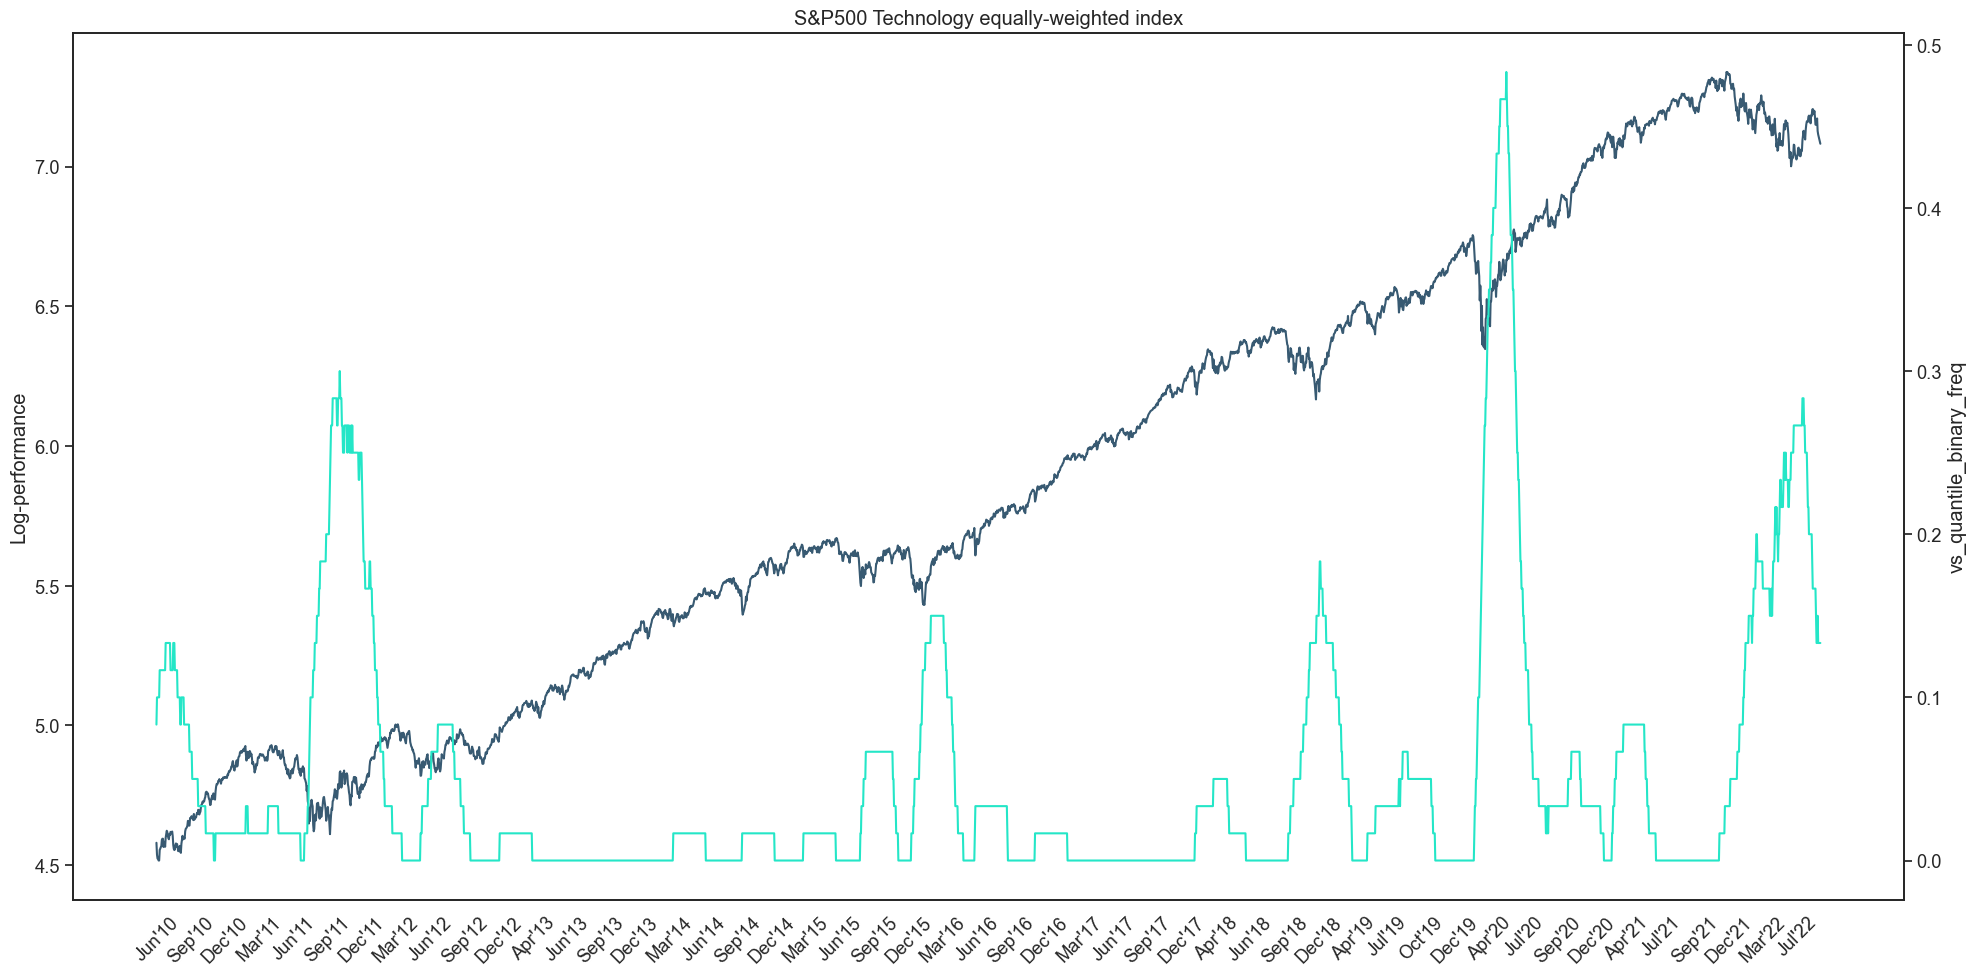

In [18]:
# From above chart, it could be seen that extreme values have tendencies to cluster.

# Plot frequency of extreme values over time

index = df.loc[1:, "Index"]
dates = df.loc[1:, "Date"]
vs_qq_binary_freq = df.loc[1:, "vs_quantile_binary_freq"]

labels_freq = np.arange(1, len(index), 21*3)

labels = []
for i in labels_freq:
    date = dates[i]
    date = datetime.datetime.strptime(date, "%Y-%m-%d")
    date = datetime.datetime.strftime(date, "%b'%y")
    labels.append(date)

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(style="white", font_scale=1.2)

sns.lineplot(y=index, x=range(len(index)), ax=ax, color="#385A72", lw=1.5)
sns.lineplot(y=vs_qq_binary_freq, x=range(len(index)), color="#24E6C7", lw=1.5, ax = ax.axes.twinx())

ax.set_title(f"S&P500 Technology equally-weighted index")
ax.set_ylabel("Log-performance")
ax.xaxis.set_ticks(labels_freq)
ax.set_xticklabels(labels)
ax.tick_params(axis = "x", rotation = 45)

ax.set_facecolor('white')
plt.tight_layout()

In [19]:
# So far, extreme values and cumulative frequency of extreme events in rolling 60 day window seem to be relevant for predicting sell signals. 
# Visually, both factors correspond well with dips on S&P500 Tech (log) index.
# Extreme values feature labels each data point in binary way, either it is extreme or not (understood as falling into extreme 5%). In isolation it doesn't really reveal any pattern.
# Cumulative frequency of extreme events improve that drawback by providing information about dynamic present over time, in particular clustering...
# ... It doesn't tell much about magnitude of changes in index though. Hence, as an improvement, let's consider momentum as a measure of cumulative return over time.
# Cumulative return over time should capture magnitude of changes and supplement aforementioned features.

In [20]:
df

,Date,Index,daily_returns,momentum30,momentum60,momentum120,vs_quantile,vs_quantile_binary,vs_quantile_binary_freq,divergence,lag_returns,sell_signal
0,2010-06-25,4.579647,0.545185,98.852998,99.186729,99.445776,0.148886,0.0,0.083333,-0.030905,-2.193406,1
1,2010-06-28,4.580263,0.061532,99.368701,99.155543,99.465618,0.141364,0.0,0.083333,-0.031225,0.545185,1
2,2010-06-29,4.537961,-4.230111,98.279685,97.914172,98.598467,-1.823472,1.0,0.100000,-0.032261,0.061532,1
3,2010-06-30,4.523635,-1.432674,98.375237,97.596871,98.342961,-0.228739,0.0,0.100000,-0.032895,-4.230111,1
4,2010-07-01,4.522223,-0.141143,98.439591,97.601193,98.128629,0.136183,0.0,0.100000,-0.033432,-1.432674,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3065,2022-08-29,7.114973,-1.253641,100.828226,99.298478,99.694806,-0.143307,0.0,0.133333,0.047900,-4.490781,0
3066,2022-08-30,7.106327,-0.864527,100.174558,99.445044,99.143211,0.043200,0.0,0.133333,0.048974,-1.253641,0
3067,2022-08-31,7.096771,-0.955636,99.784020,99.277308,99.218188,0.010588,0.0,0.133333,0.049323,-0.864527,0
3068,2022-09-01,7.090852,-0.591951,99.476282,99.072472,99.324979,0.095327,0.0,0.133333,0.049185,-0.955636,0


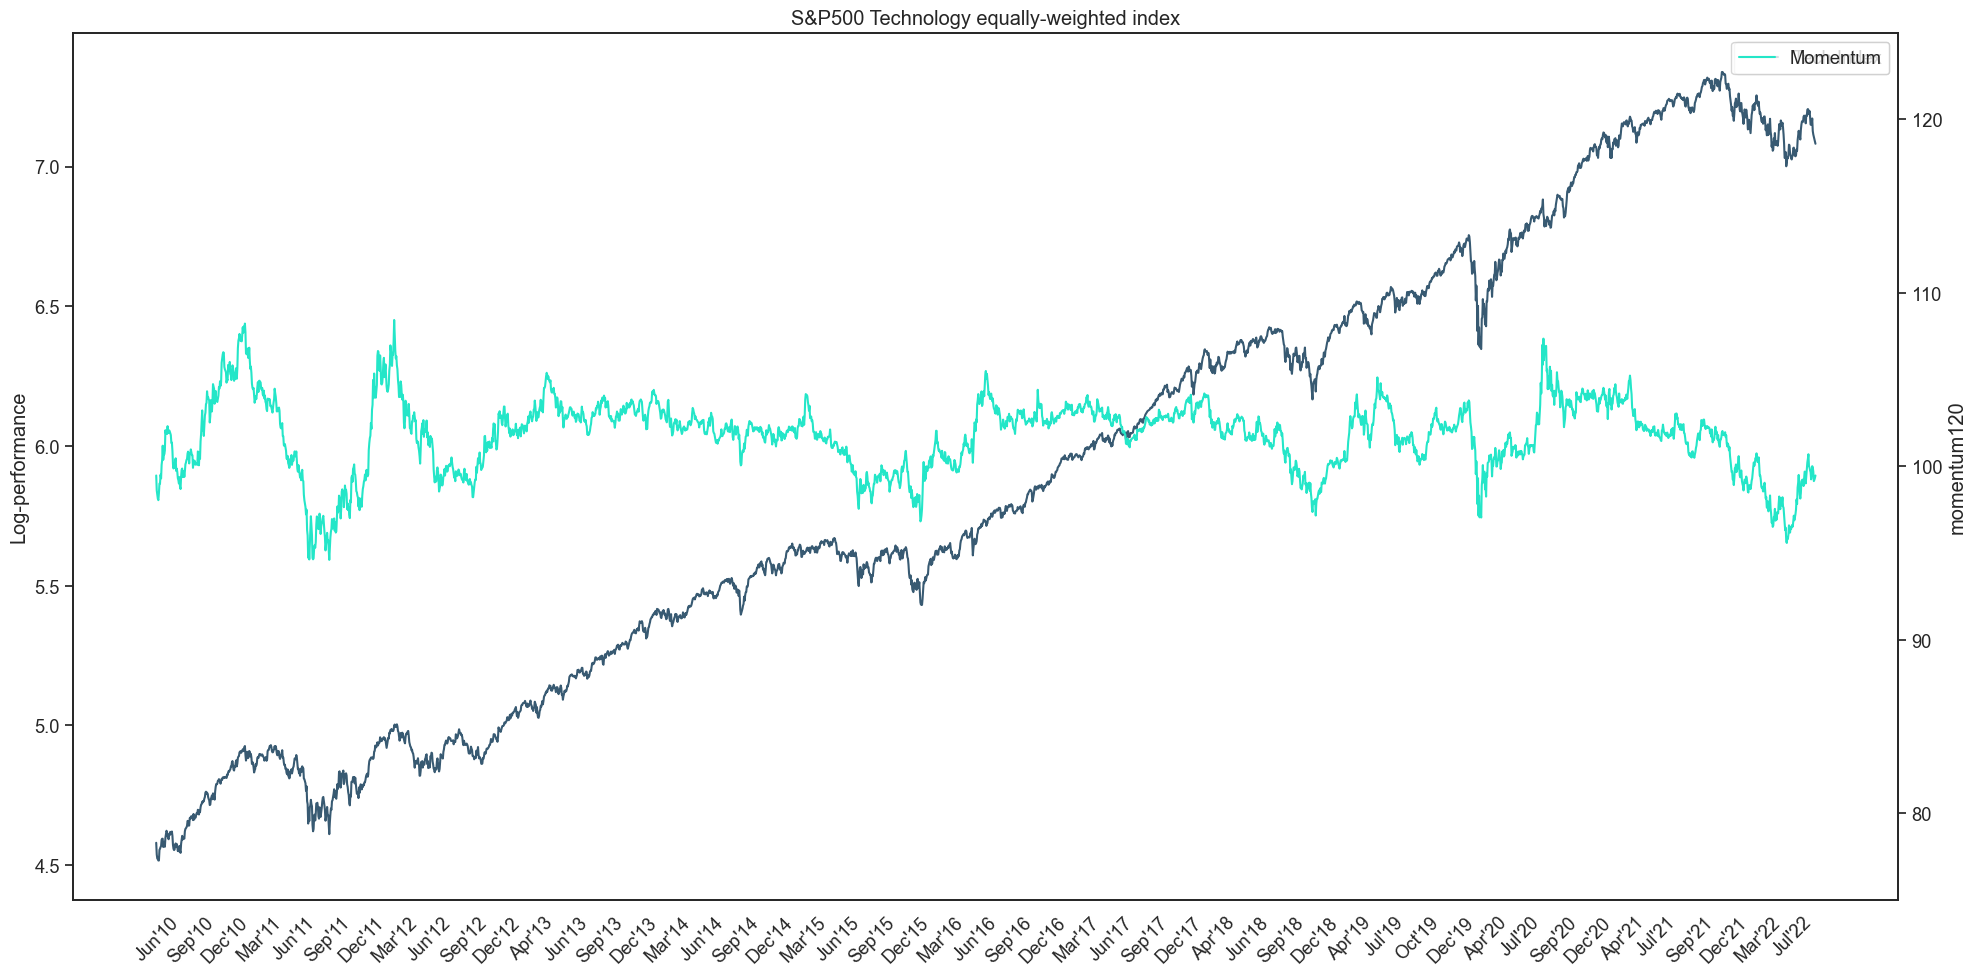

In [21]:
# Plot momentum against S&P Tech

# Where those points lie on time series chart?

# Prepare data for time series chart

index = df.loc[1:, "Index"]
dates = df.loc[1:, "Date"]
moment30 = df.loc[1:, "momentum30"]
moment60 = df.loc[1:, "momentum60"]
moment120 = df.loc[1:, "momentum120"]


labels_freq = np.arange(1, len(index), 21*3)

labels = []
for i in labels_freq:
    date = dates[i]
    date = datetime.datetime.strptime(date, "%Y-%m-%d")
    date = datetime.datetime.strftime(date, "%b'%y")
    labels.append(date)

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(style="white", font_scale=1.2)

sns.lineplot(y=index, x=range(len(index)), ax=ax, color="#385A72", lw=1.5)

ax2 = ax.axes.twinx()
# sns.lineplot(y=moment30, x=range(len(index)), color="#24E6C7", lw=1.5, ax = ax2)
# sns.lineplot(y=moment60, x=range(len(index)), color="#24E6C8", lw=1.5, ax = ax2)
sns.lineplot(y=moment120, x=range(len(index)), color="#24E6C8", lw=1.5, ax = ax2)

ax.set_title(f"S&P500 Technology equally-weighted index")
ax.set_ylabel("Log-performance")
ax.xaxis.set_ticks(labels_freq)
ax.set_xticklabels(labels)
ax.tick_params(axis = "x", rotation = 45)
ax.legend(labels = ['Tech Index'])

ax2.legend(labels = ['Momentum'])
ax2.set_ylim(75,125)

ax.set_facecolor('white')
plt.tight_layout()


In [22]:
# Momentum series seem to be oscilating around long-term mean. At each point in time, value of momentum helps understand strenght of the index at this point. 
# For example, momentum of 120 captures weakness/strength off the index as compared to T-days before.
# Tech index data as well as momentum is noisy, with peaks and valleys following each other. It is not an easy task to distinguish if next day's rebound will mean trend reversion (or the other way around).
# To address that issue, we can create two moving average series of different length, compare them and yield new metric - divergence.
# Divergence will indicate what's happening with the index as compared to longer-term trend. It can either suggest trend reversion or trend strenghtening. 
# This bundled with momentum series creates a tool that is powerful and frequently utilized in technical analysis - MACD. 
# Let's proceed with divergence calculation. To keep consistency with periods selected so far, moving averages will be of 30 and 60 days.

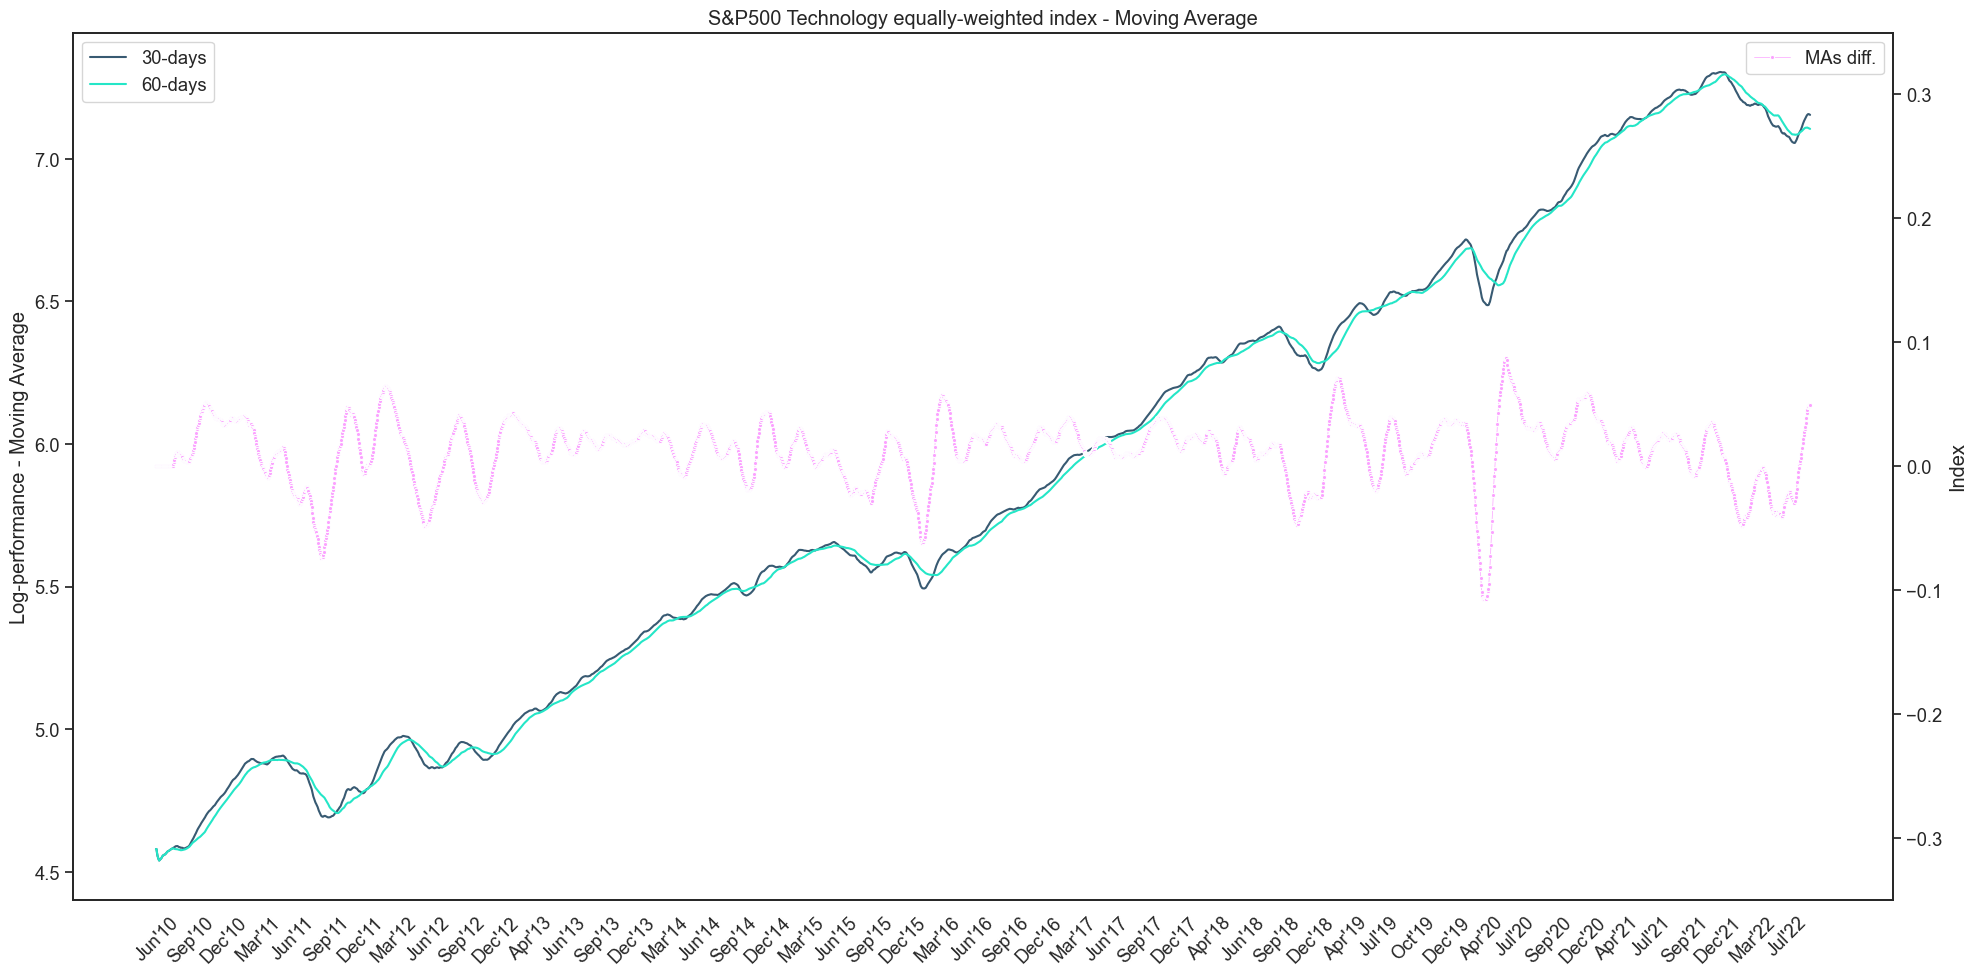

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))

short_ma = df.Index.rolling(window = 30, min_periods=1).mean()
long_ma = df.Index.rolling(window = 60, min_periods=1).mean()

sns.set(style="white", font_scale=1.2)

sns.lineplot(y=short_ma, x=range(len(short_ma)), ax=ax, color="#385A72", lw=1.5)
sns.lineplot(y=long_ma, x=range(len(long_ma)), color="#24E6C7", lw=1.5, ax = ax)

ax2 = ax.axes.twinx()
sns.lineplot(y=short_ma - long_ma, x=range(len(short_ma)), color="#FBA2FF", lw=0.5, ax = ax2, marker = ".")

ax.set_title(f"S&P500 Technology equally-weighted index - Moving Average")
ax.set_ylabel("Log-performance - Moving Average")
ax.xaxis.set_ticks(labels_freq)
ax.set_xticklabels(labels)
ax.tick_params(axis = "x", rotation = 45)

ax2.set_ylim(-0.35,0.35)
ax2.legend(labels = ["MAs diff."])

ax.legend(labels = ["30-days", "60-days"])
ax.set_facecolor('white')
plt.tight_layout()

# ax.properties()

In [24]:
# Difference between moving averages seem to capture the dynamic of underlying changes. Large difference between short and long term MAs means that significant movements are happenning. 
# This might be important feature in context of generating sell signals.

In [25]:

# So far the discussion referred to high-level summary of Tech Index dataset including descriptive statistics and generating metrics that might be capturing dynamics in the data well.
# Generally, stock market behavior is known to follow random walk. It means that observation at time t and s are NOT independent.
# Therefore, it's crucial to analyze autocorrelation in the data as yesterday's value might have significant impact on today's value.
# As a next step, let's explore autocorrelation patterns hidden in the data.

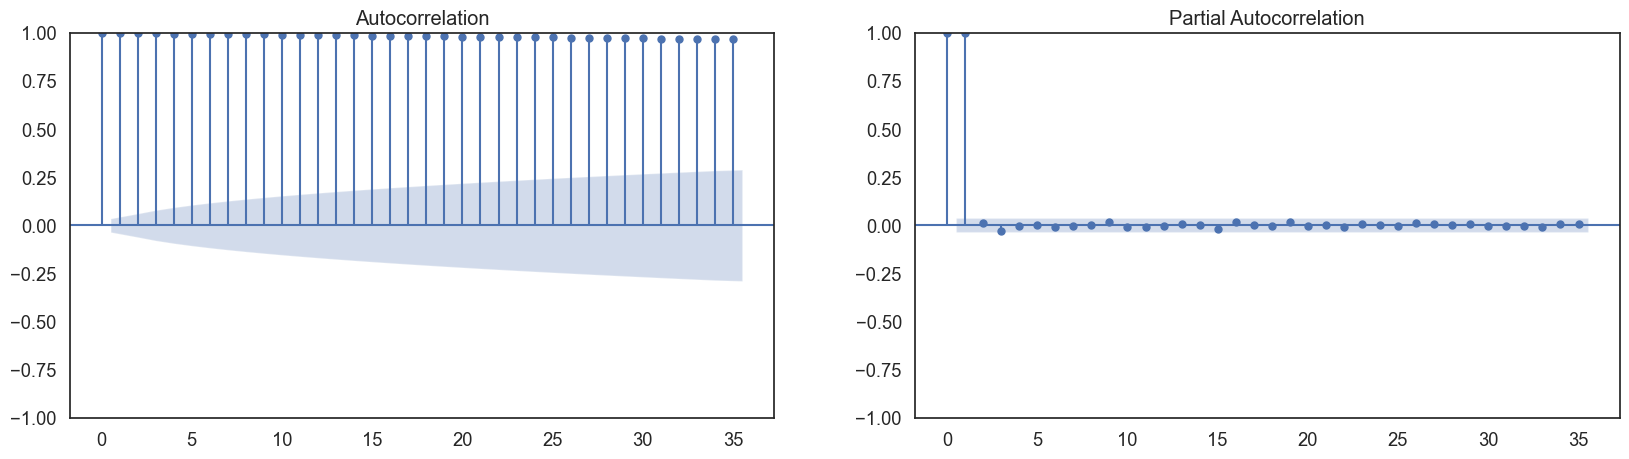

In [26]:
# Plot autocorrelation and partial autocorrelation plots.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize = (20,5))

plot_acf(df.Index, ax = ax[0])
plot_pacf(df.Index, ax = ax[1], method="ywm")

plt.show()

In [27]:
# From chart above it's clear that significiant autocorrelation is present in the data, particularly between today's value and value at lag 1. 
# This is in line with presence of increasing trend visible in Technology Index plot.
# In this case, presence of autocorrelation stems from trend in the data. What about differenced series, eg. removed trend? Is the autocorrelation still present there?

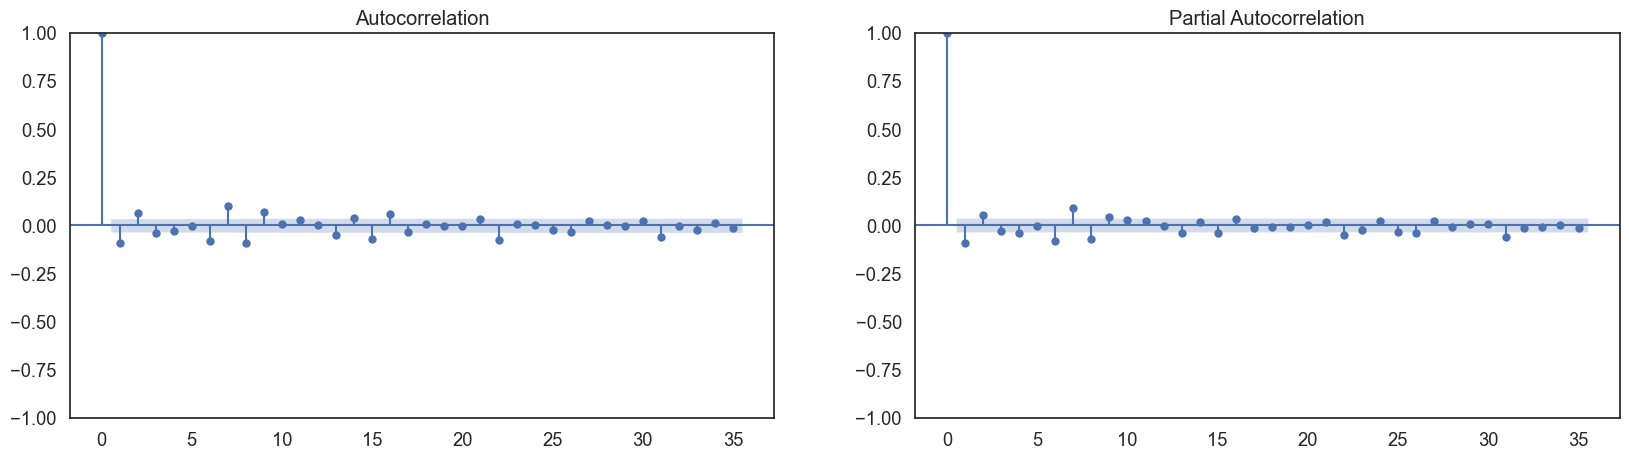

In [28]:
# Plot autocorrelation and partial autocorrelation plots for differenced (untrended) series

fig, ax = plt.subplots(1, 2, figsize = (20,5))

plot_acf(fat_tails.Index, ax = ax[0])
plot_pacf(fat_tails.Index, ax = ax[1], method="ywm")

plt.show()

In [29]:
# For differenced series autocorrelation and partial autocorrelation coefficients are considerably weakened. Still, for specific lags, there are some coefficients exceeding 95% (default) confidence interval.
# For 95% CI, c5% can be misclassified by pure randomness. For c40 lags ACF/PACF calculates, it's around 2 misclassified observations. 
# However, from charts above it can be seen that there are more cases than just 2. Those are not significant, but it proves there is still some autocorrelation in differenced series. 
# It doesn't necessarily means that including lags of differenced series will improve ML model. 

In [30]:
# Let's confirm autocorrelation parametrically - Ljung-Box test

from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox = acorr_ljungbox(fat_tails.Index, lags = 10)
ljungbox.loc[:, "lb_pvalue"] = ljungbox.lb_pvalue.map("{:,.5}".format)
ljungbox

,lb_stat,lb_pvalue
1,27.218840,1.8168e-07
2,39.635254,2.4735e-09
3,43.962328,1.5372e-09
4,46.892546,1.6056e-09
5,46.906013,5.9377e-09
6,68.109177,9.9791e-13
7,100.536313,8.3593e-19
8,126.790746,1.3076e-23
9,141.752479,4.4835e-26
10,141.912942,1.7083e-25


In [31]:
# P-values for first 10 lags are less than 0.05, meaning that for each lag we can reject null hypothesis saying that series are independently distributed;
# Observations are NOT independently distributed according to Ljung Box test, they exhibit serial correlation.
# This conclusion is in line with observations derived from analysis of ACF & PACF plots.
# Therefore, lags of series should have some predictive power in potential model.

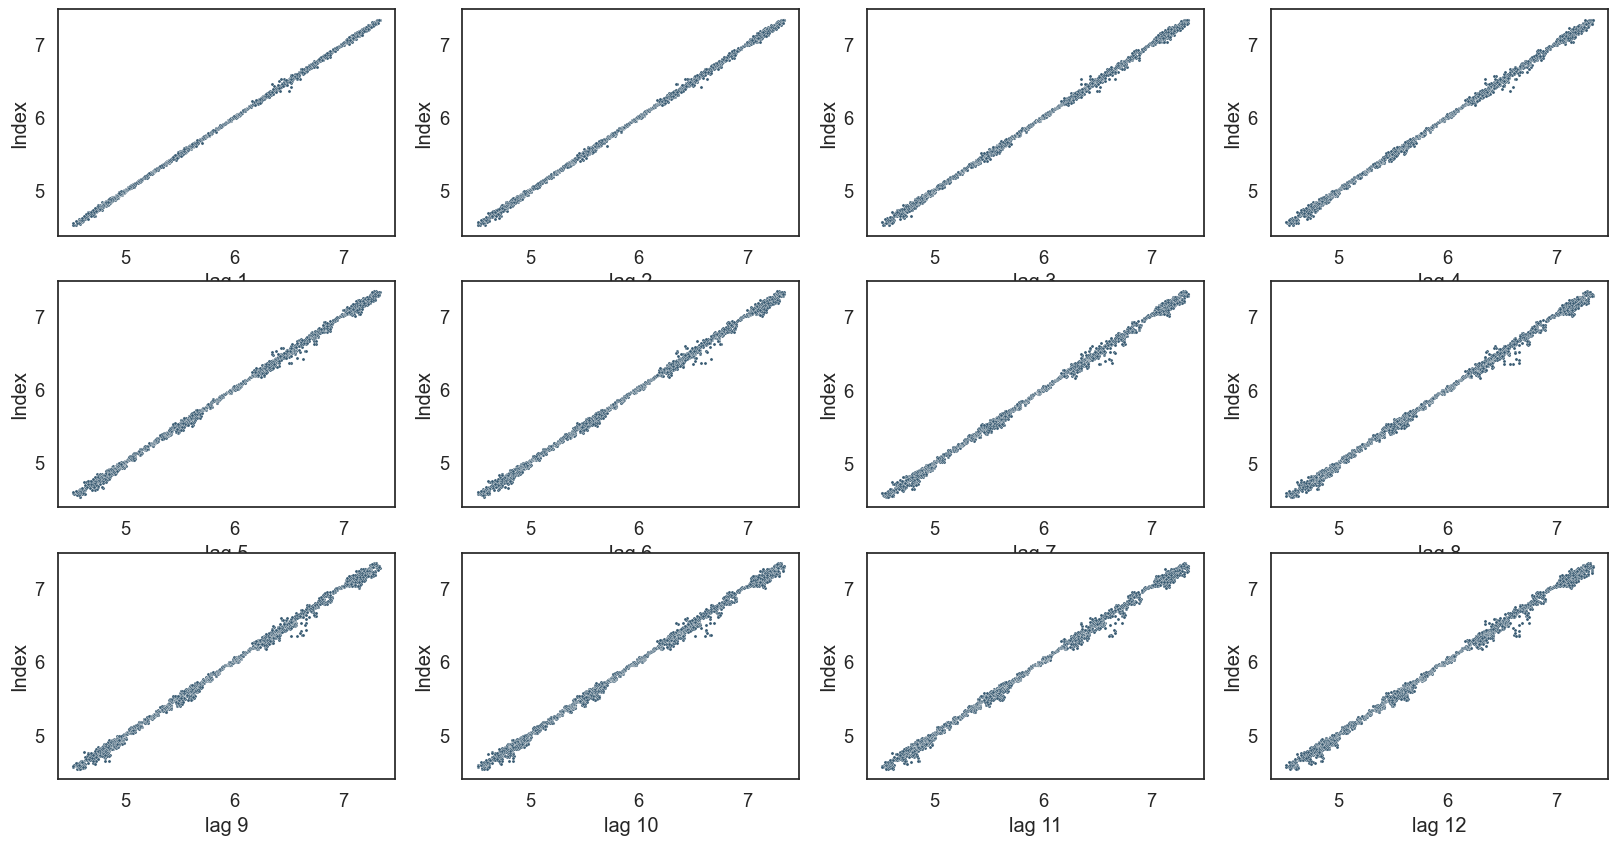

In [32]:
# Plot of Tech Index against it's first 12 lags (12 as to present it in 3x4 form)

fig, ax = plt.subplots(3,4, figsize = (20,10))

i = 1
for ind in range(0,3):
    for col in range (0,4):
        sns.scatterplot(x = df.Index.shift(i), y = df.Index, ax = ax[ind,col], color="#385A72", s = 5)
        ax[ind,col].set_xlabel(f"lag {i}")
        i += 1

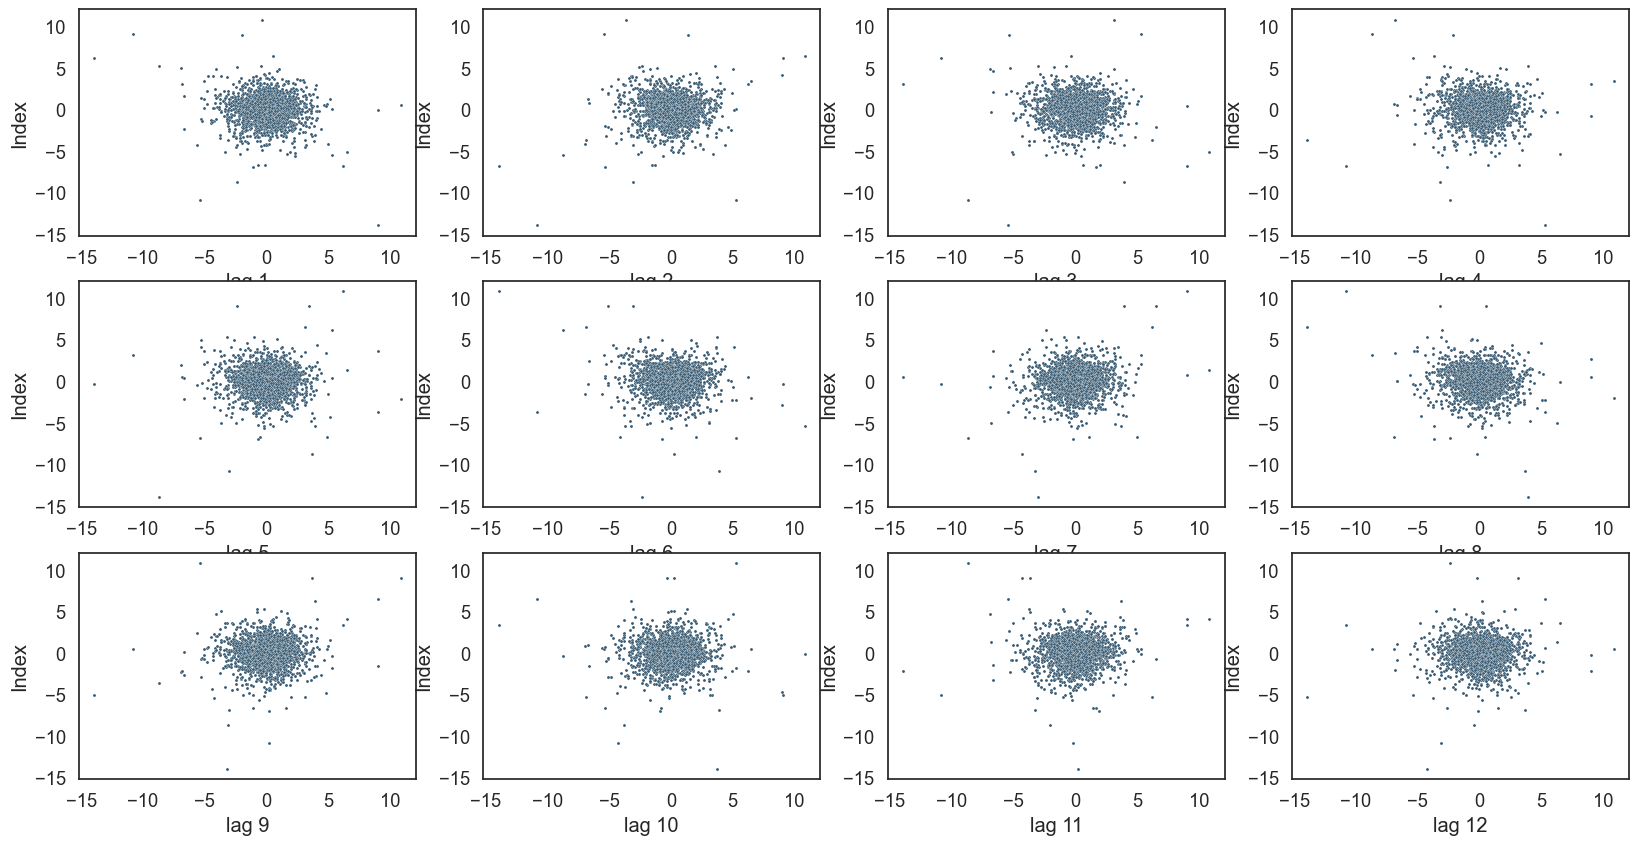

In [33]:
# Plot of Differenced Tech Index against it's first 12 lags (12 as to present it in 3x4 form)

fig, ax = plt.subplots(3,4, figsize = (20,10))

i = 1
for ind in range(0,3):
    for col in range (0,4):
        sns.scatterplot(x = fat_tails.Index.shift(i), y = fat_tails.Index, ax = ax[ind,col], color="#385A72", lw=0.5, s = 5)
        ax[ind,col].set_xlabel(f"lag {i}")
        i += 1

In [34]:
# Plots of Tech Index against its lags confirms the observations so far, ie. there is strong linear relationship.
# Plots of Differenced Tech Index againts its lags DOES NOT confirm the observations so far. It looks like there is no relationship between the series, despite ACF/PACF & Ljung Box test saying the opposite.

In [35]:
# The idea of the project is to create ML model that would help in deciding when to sell the index. 
# Therefore, exogenous (dependent) variable would be binary: either SELL or NOT SELL, coded as 1 and 0, respectively.

In [36]:
# As a starting point, let's create interactive chart using plotly, so that dates corresponding to bear markets could be easily extracted.

import plotly.graph_objects as go
from plotly.subplots import make_subplots

index = df.Index
dates = df.Date

labels_freq = np.arange(0, len(index), 21 * 3)

labels = []
for i in labels_freq:
    date = dates[i]
    date = datetime.datetime.strptime(date, "%Y-%m-%d")
    date = datetime.datetime.strftime(date, "%b'%y")
    labels.append(date)


fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(template="plotly_white", width=1440, height=720)

fig.add_trace(go.Line(x=dates, y=index, name="Index", line=dict(color="#385A72")))

c:\Users\lukas\OneDrive\Pulpit\data-science\Projects\bear_markets\env1\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [37]:
# From chart above, bear regime seem to correspond to following dates: 

bear_regime_dates = [
    ["2010-04-26", "2010-08-31"],
    ["2011-07-07","2011-10-05"],
    ["2012-05-01", "2012-07-24"],
    ["2012-09-14"," 2012-11-15"],
    ["2014-09-18", "2014-10-13"],
    ["2015-06-22", "2015-09-29"],
    ["2015-12-29", "2016-02-11"],
    ["2018-10-03", "2018-12-24"],
    ["2020-02-19", "2020-04-03"]
]


In [38]:
# Let's highlight the bear market on chart for selected dates

for dates in bear_regime_dates:
    fig.add_vrect(x0 = dates[0], x1 = dates[1], fillcolor = "#24E6C7", opacity = 0.5, line_width = 0)

fig.show()

In [45]:
# Generate basic statistics for differenced tech index split by sell/not sell variable

d_df[["sell_signal","daily_returns"]].groupby("sell_signal").describe()

daily_returns                                                     \
                    count      mean       std        min       25%       50%   
sell_signal                                                                    
0                  2648.0  0.151216  1.226838  -6.671493 -0.478226  0.181080   
1                   421.0 -0.356755  2.294023 -13.947909 -1.476095 -0.339132   

                                  
                  75%        max  
sell_signal                       
0            0.831168   9.012493  
1            0.870723  10.829398

In [46]:
df

,Date,Index,daily_returns,momentum30,momentum60,momentum120,vs_quantile,vs_quantile_binary,vs_quantile_binary_freq,divergence,lag_returns,sell_signal
0,2010-06-25,4.579647,0.545185,98.852998,99.186729,99.445776,0.148886,0.0,0.083333,-0.030905,-2.193406,1
1,2010-06-28,4.580263,0.061532,99.368701,99.155543,99.465618,0.141364,0.0,0.083333,-0.031225,0.545185,1
2,2010-06-29,4.537961,-4.230111,98.279685,97.914172,98.598467,-1.823472,1.0,0.100000,-0.032261,0.061532,1
3,2010-06-30,4.523635,-1.432674,98.375237,97.596871,98.342961,-0.228739,0.0,0.100000,-0.032895,-4.230111,1
4,2010-07-01,4.522223,-0.141143,98.439591,97.601193,98.128629,0.136183,0.0,0.100000,-0.033432,-1.432674,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3065,2022-08-29,7.114973,-1.253641,100.828226,99.298478,99.694806,-0.143307,0.0,0.133333,0.047900,-4.490781,0
3066,2022-08-30,7.106327,-0.864527,100.174558,99.445044,99.143211,0.043200,0.0,0.133333,0.048974,-1.253641,0
3067,2022-08-31,7.096771,-0.955636,99.784020,99.277308,99.218188,0.010588,0.0,0.133333,0.049323,-0.864527,0
3068,2022-09-01,7.090852,-0.591951,99.476282,99.072472,99.324979,0.095327,0.0,0.133333,0.049185,-0.955636,0


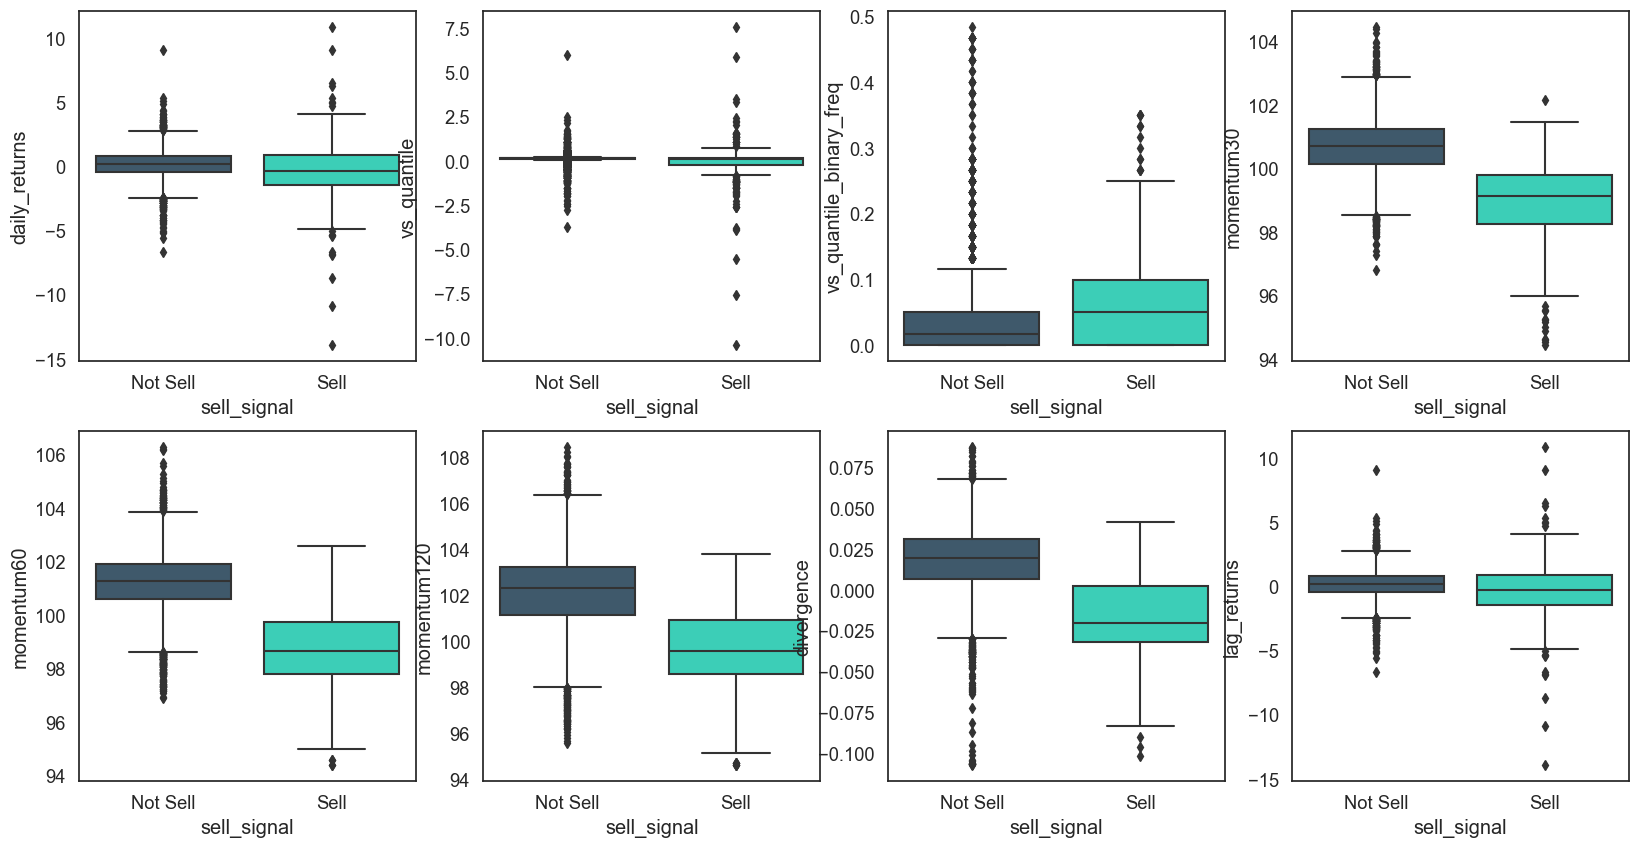

In [47]:
# Plot boxplots for continuous variables without trend, split by sell/not sell signal 

sell_signal = df.sell_signal
continuous_vars = ["daily_returns", "vs_quantile", "vs_quantile_binary_freq", "momentum30", "momentum60", "momentum120", "divergence", "lag_returns"]
for_boxplot = df[continuous_vars]

rows = 2
cols = 4
fig, ax = plt.subplots(rows, cols, figsize = (20,10))

ind = 0
for row in range(rows):
    for col in range(cols):
        # print(row, col)
        sns.boxplot(x = sell_signal, y = for_boxplot.iloc[:,ind], palette = ["#385A72", "#24E6C7"], ax = ax[row, col])
        ax[row,col].set_xticklabels(["Not Sell","Sell"])
        ind  += 1

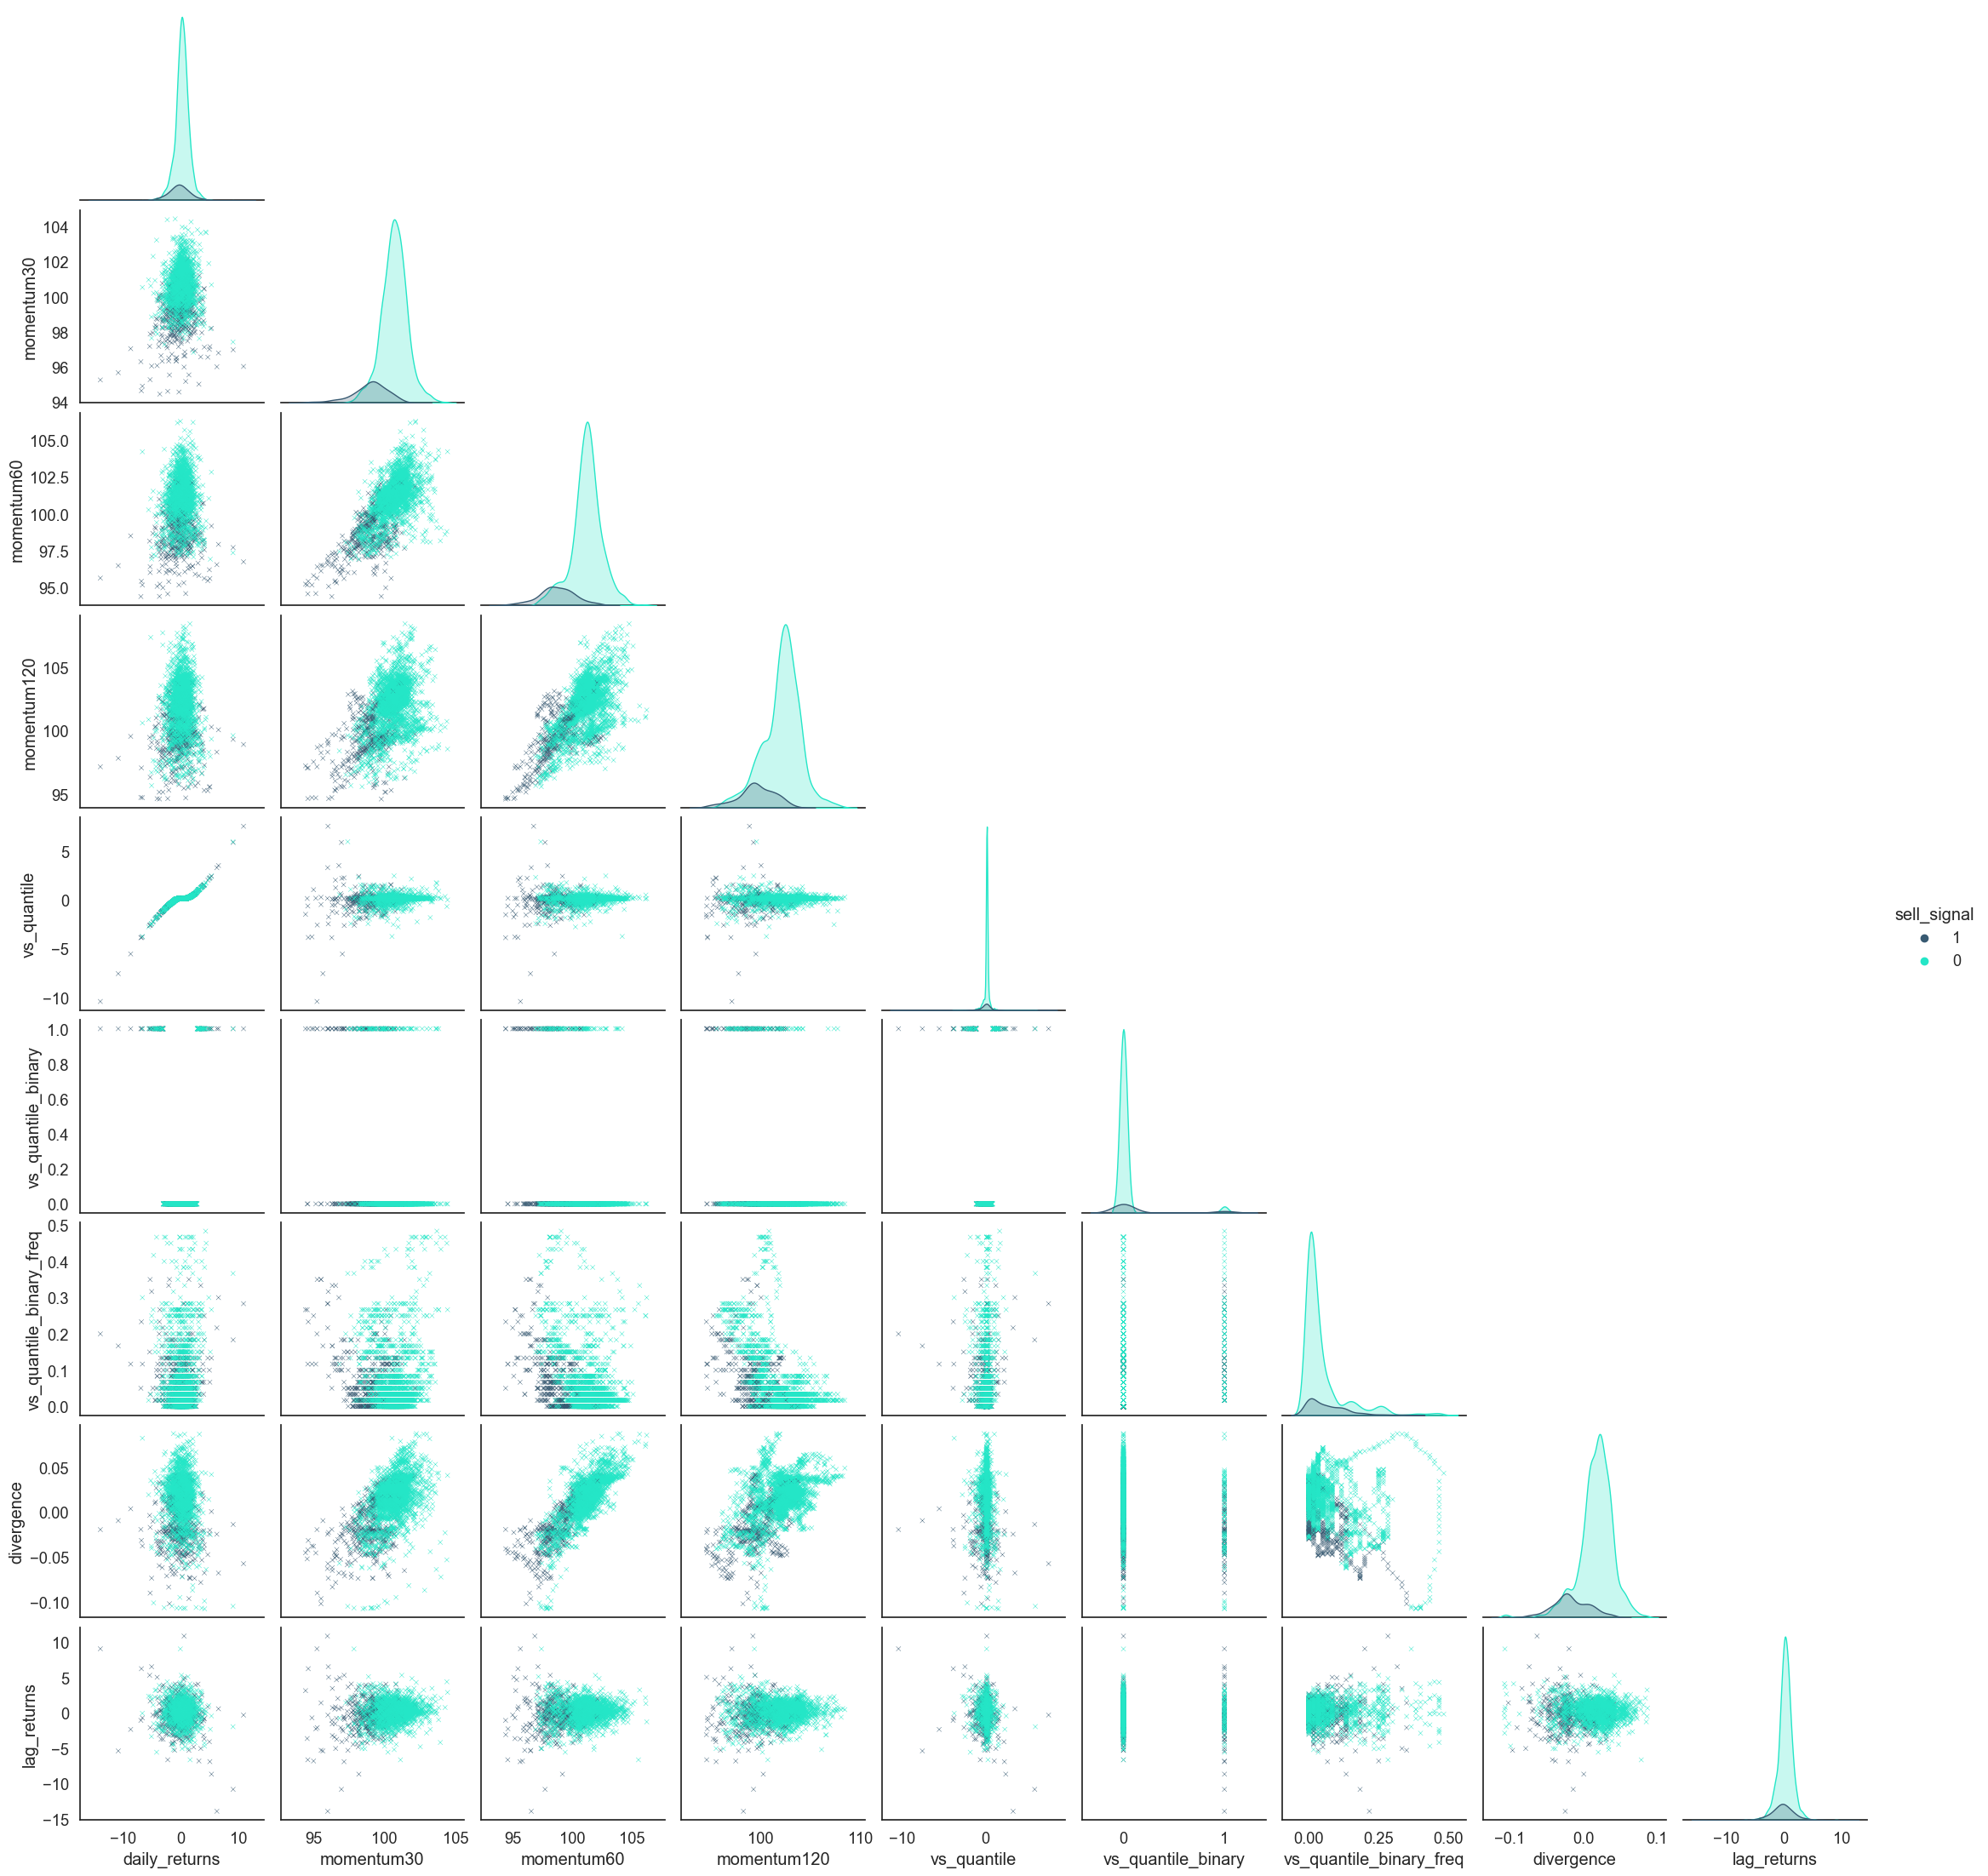

In [53]:
# Correlogram of variables

colors = ["#385A72", "#24E6C7"]
sns.set_palette(sns.color_palette(colors))
fig = sns.pairplot(
    df.iloc[:, 2:],
    kind="scatter",
    hue="sell_signal",
    hue_order=[1, 0],
    plot_kws={"marker": "x", "s": 15},
    corner=True,
    diag_kind="kde",
)
